# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split as tts

In [9]:
X_train, X_test, y_train, y_test = tts(X,y)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [12]:
from sklearn.linear_model import LinearRegression as linreg

In [13]:
# modelo

linreg=linreg()   # inicializar el modelo

linreg.fit(X_train, y_train)   # entrenar el modelo

y_pred=linreg.predict(X_test)

In [15]:
y_pred[:5]

array([[15.97648335],
       [19.76959077],
       [20.54715872],
       [21.43821069],
       [19.64790403]])

## 3. Calculate and print R-squared for both the training and the testing set.

In [16]:
linreg.score(X_test, y_test)

0.4715605546152313

In [17]:
linreg.score(X_train, y_train)

0.7886599980076283

## 4. Calculate and print mean squared error for both the training and the testing set.

In [18]:
from sklearn.metrics import mean_squared_error as mse

In [19]:
mse(y_test, y_pred)

32.94060390131864

In [24]:
y_pred_train=linreg.predict(X_train)

In [26]:
mse(y_train, y_pred_train)

19.386553355214172

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [27]:
from sklearn.metrics import mean_absolute_error as mae

In [28]:
mae(y_test, y_pred)

3.698680419073829

In [29]:
mae(y_train, y_pred_train)

3.1333816311249696

## Classification Model Evaluation

In [30]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [31]:
X_train, X_test, y_train, y_test = tts(X,y)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [34]:
from sklearn.linear_model import LogisticRegression as LogReg

In [35]:
LogReg=LogReg()

LogReg.fit(X_train, y_train)

y_pred_logreg = LogReg.predict(X_test)

In [36]:
y_pred_logreg[:5]

array([1, 2, 1, 0, 0])

In [37]:
y_pred_logreg_train = LogReg.predict(X_train)

In [38]:
y_pred_logreg_train[:5]

array([0, 2, 1, 1, 1])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [39]:
LogReg.score(X_test, y_test)

0.9473684210526315

In [40]:
LogReg.score(X_train, y_train)

0.9910714285714286

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [46]:
from sklearn.metrics import balanced_accuracy_score as balanced_score

In [47]:
balanced_score(y_test, y_pred_logreg)

0.9393939393939394

In [48]:
balanced_score(y_train, y_pred_logreg_train)

0.9914529914529915

## 10. Calculate and print the precision score for both the training and the testing set.

In [41]:
from sklearn.metrics import precision_score as prec

In [49]:
prec(y_test, y_pred_logreg, average="micro")

0.9473684210526315

In [50]:
prec(y_train, y_pred_logreg_train, average="micro")

0.9910714285714286

## 11. Calculate and print the recall score for both the training and the testing set.

In [51]:
from sklearn.metrics import recall_score as rec

In [53]:
rec(y_test, y_pred_logreg, average='micro')

0.9473684210526315

In [54]:
rec(y_train, y_pred_logreg_train, average="micro")

0.9910714285714286

## 12. Calculate and print the F1 score for both the training and the testing set.

In [55]:
from sklearn.metrics import f1_score as f1

In [57]:
f1(y_test, y_pred_logreg, average="micro")

0.9473684210526315

In [58]:
f1(y_train, y_pred_logreg_train, average="micro")

0.9910714285714286

## 13. Generate confusion matrices for both the training and the testing set.

In [59]:
from sklearn.metrics import confusion_matrix as cm

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
cm(y_test, y_pred_logreg)

array([[20,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  7]], dtype=int64)

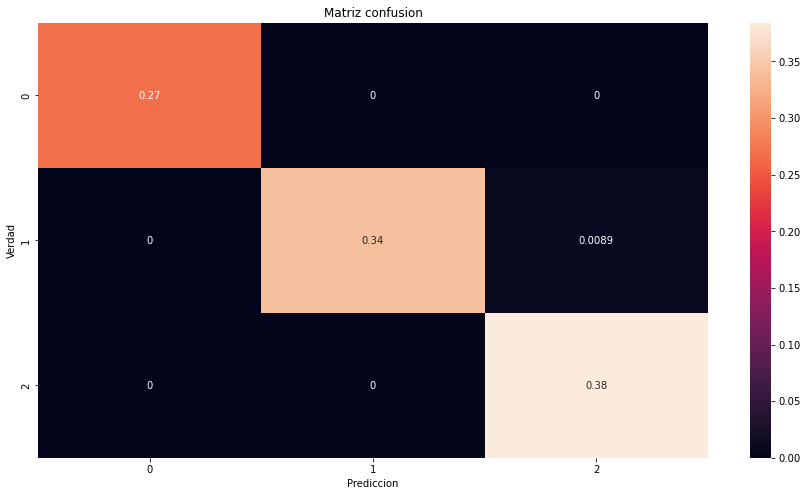

In [64]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_logreg_train)/sum(sum(cm(y_train, y_pred_logreg_train))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [63]:
cm(y_train, y_pred_logreg_train)

array([[30,  0,  0],
       [ 0, 38,  1],
       [ 0,  0, 43]], dtype=int64)

In [ ]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_logreg)/sum(sum(cm(y_test, y_pred_logreg))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.